In [2]:
%matplotlib inline
%load_ext autoreload

%autoreload 2

In [12]:
import json
import gff3_parsing
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import glob
import statsmodels.stats.multitest as multi

In [23]:
host_id = 28450
p_values = []
viral_means = []

host_df = pd.read_csv("../Data/host_genomes/{}.tsv".format(host_id))
host_mean = np.mean(host_df["energy_binding"])
print(host_df.shape)
for tsv_file in glob.glob("../Data/{}_rep_viruses/*tsv".format(host_id)):
    viral_df = pd.read_csv(tsv_file, sep = "\t")
    
    rstat, p_value = stats.ranksums(host_df["energy_binding"], viral_df["energy_binding"])
    p_values.append(p_value)
    viral_means.append(np.mean(viral_df["energy_binding"]))

(5727, 13)


In [20]:
significant_pvalues = []
for p in p_values:
    if p <= 0.01:
        significant_pvalues.append(p)
        
print(len(significant_pvalues), len(p_values), len(significant_pvalues)/len(p_values))


19 33 0.5757575757575758


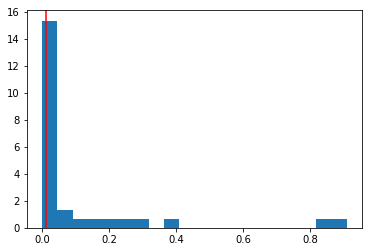

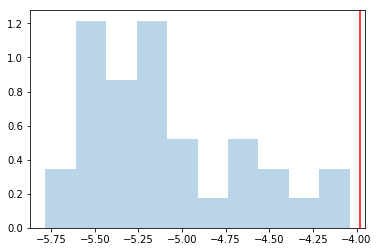

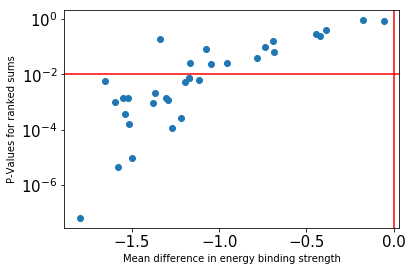

In [21]:
#2
fig, ax = plt.subplots()
ax.hist(p_values, 20, density = True)
ax.axvline(0.01, color = "r")


fig2, ax2 = plt.subplots()
ax2.hist(viral_means, density= True, alpha = 0.3)
ax2.axvline(host_mean, color = "r")

fig3, ax = plt.subplots()
ax.set_ylabel("P-Values for ranked sums")
ax.set_xlabel("Mean difference in energy binding strength")
ax.tick_params(labelsize = 15)
ax.semilogy(np.array(viral_means)-host_mean,p_values, marker = "o", linestyle = "")
ax.axvline(0, color = "r")
ax.axhline(.01, color = "r")

In [24]:
truth_array, corrected_p_values = multi.fdrcorrection(p_values)

fig, ax = plt.subplots()
ax.hist(corrected_p_values, 20, density = True)
ax.axvline(0.01, color = "r")


significant_pvalues = []
for p in corrected_p_values:
    if p <= 0.01:
        significant_pvalues.append(p)
        
print(len(significant_pvalues), len(corrected_p_values), len(significant_pvalues)/len(corrected_p_values))

[0.19233415858946645, 0.005140729281529147, 0.0013840123040530794, 0.09860435389182294, 0.00011211186568638786, 0.0021908991510826855, 0.000256280373178642, 0.0070756538119678344, 0.0012044748823690401, 0.24538631324260296, 0.06577463914948042, 0.006199114884144814, 0.0009817609626249924, 0.023999205088891664, 0.9086375835858286, 0.0014370629121527505, 0.03876279610989025, 6.297424949397962e-08, 0.0009365587540826277, 0.007603801800384046, 0.40810376501948087, 0.08002979042381511, 0.2959212640155109, 4.4040617512440935e-06, 9.180172720217067e-06, 0.1633842038228135, 0.8184291215994062, 0.02588033161782577, 0.00015659384798812244, 0.02661216180558053, 0.0013770902587153157, 0.005856551283284666, 0.00036831149724526706] [2.26679544e-01 1.13096044e-02 3.64792893e-03 1.25151680e-01
 9.24922892e-04 5.16426228e-03 1.40954205e-03 1.29720320e-02
 3.64792893e-03 2.79232701e-01 9.04401288e-02 1.20335760e-02
 3.59979020e-03 3.95986884e-02 9.08637584e-01 3.64792893e-03
 5.56161857e-02 2.07815023e-

In [27]:
stats.combine_pvalues(p_values)

(350.85934851896764, 1.948887594518697e-40)